In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC 

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'heart_failure_clinical_records_dataset.csv'

In [3]:
#https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [4]:
# Import and read dataset
data = getDataset(filename)
df = data.copy()

data.head(10)

heart_failure_clinical_records_dataset.csv already exists


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.25, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (224, 12)
X_test Shape  :  (75, 12)
y_train Shape :  (224,)
y_test Shape  :  (75,)


In [7]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7333
SVC f1-score  : 0.6000
SVC precision : 0.4839
SVC recall    : 0.7895

               precision    recall  f1-score   support

           0       0.91      0.71      0.80        56
           1       0.48      0.79      0.60        19

    accuracy                           0.73        75
   macro avg       0.70      0.75      0.70        75
weighted avg       0.80      0.73      0.75        75



Calculatate confusion matrix
<br>TP  FP
<br>FN  TN 

<AxesSubplot:>

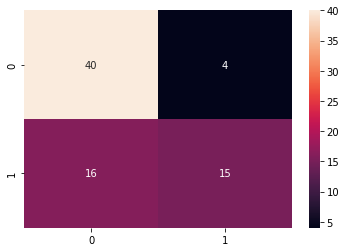

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [9]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.001, 0.01, 0.1, 1, 10, 100, 1000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
clf.fit(X_train, y_train) 
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [10]:
clf = SVC(C=0.1, gamma=0.1, kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7467
SVC f1-score  : 0.6122
SVC precision : 0.4839
SVC recall    : 0.8333

               precision    recall  f1-score   support

           0       0.93      0.72      0.81        57
           1       0.48      0.83      0.61        18

    accuracy                           0.75        75
   macro avg       0.71      0.78      0.71        75
weighted avg       0.82      0.75      0.76        75



<AxesSubplot:>

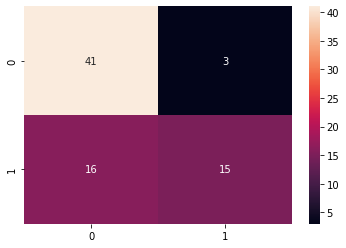

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

<AxesSubplot:>

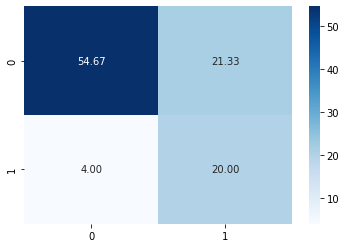

In [12]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

In [13]:
#As we face an imbalance dataset, we might consider using SMOTE
out_data.value_counts()

DEATH_EVENT
0              203
1               96
dtype: int64

## After the SMOTE (Synthetic Minority Oversampling Technique) process

In [14]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

sms = SMOTE(random_state=42)
X_res, y_res = sms.fit_resample(inp_data, out_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (304, 12)
X_test Shape  :  (102, 12)
y_train Shape :  (304,)
y_test Shape  :  (102,)


In [15]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8627
SVC f1-score  : 0.8704
SVC precision : 0.9216
SVC recall    : 0.8246

               precision    recall  f1-score   support

           0       0.80      0.91      0.85        45
           1       0.92      0.82      0.87        57

    accuracy                           0.86       102
   macro avg       0.86      0.87      0.86       102
weighted avg       0.87      0.86      0.86       102



<AxesSubplot:>

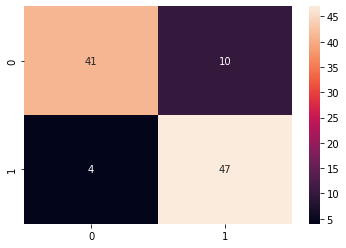

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [17]:
# find best parameters with SVC | Step 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.001, 0.01, 0.1, 1, 10, 100, 1000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [18]:
# find best parameters with SVC | Step 2
kernels = list(['rbf'])
c = list([0.5,1,2,3,4,5,6,7])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5, 'gamma': 0.2, 'kernel': 'rbf'}

In [19]:
clf = SVC(C=5, gamma=0.2, kernel='rbf') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.9118
SVC f1-score  : 0.9159
SVC precision : 0.9608
SVC recall    : 0.8750

               precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.96      0.88      0.92        56

    accuracy                           0.91       102
   macro avg       0.91      0.92      0.91       102
weighted avg       0.92      0.91      0.91       102



<AxesSubplot:>

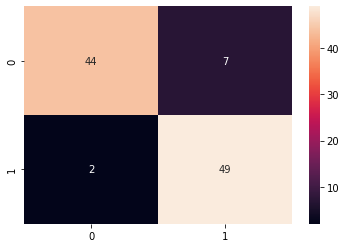

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

<AxesSubplot:>

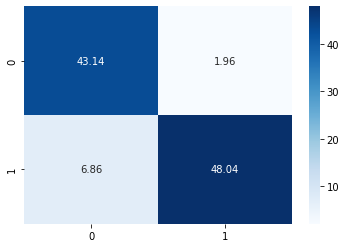

In [21]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")

## Reporting

I evaluated the results I found with Confusion Matrix, the results are as follows:

**Correctly predicted -> %91.18 (93 of 102 predict are correct)**
- True Negative -> %48.04 -> Those who were predicted not to die and who did not die
- True Positive -> %43.14 -> Those who were predicted to die and who did die

**Wrong predicted-> %8.82 (9 of 102 predict are wrong)**
- False Positive -> %01.96 -> Those who were predicted to die but who did not die
- False Negative -> %06.86 -> Those who were predicted to not die but who did die